In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.5/99.8 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.6/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.9/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.2/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 1.5/99.8 MB 4.1 MB/s eta 0:00:24
    --------------------------------------- 1.6/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('PRAJIND.NS_stock_data.csv')
df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,01-07-2002,2.32,2.34,2.21,2.34,1.530455,441200.0,PRAJIND.NS
1,02-07-2002,2.57,2.58,2.34,2.58,1.687424,1946940.0,PRAJIND.NS
2,03-07-2002,2.66,2.84,2.61,2.84,1.857476,4030840.0,PRAJIND.NS
3,04-07-2002,2.99,3.12,2.95,3.12,2.040607,2315800.0,PRAJIND.NS
4,05-07-2002,3.30,3.44,3.01,3.15,2.060228,6273960.0,PRAJIND.NS


In [19]:
df.shape

(5430, 8)

In [20]:
df.describe()

,open,high,low,close,adjclose,volume
count,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5.420000e+03
mean,123.548843,126.271361,120.688411,123.181498,110.166297,1.374934e+06
std,127.139931,129.440545,124.707979,126.818517,126.944354,1.864194e+06
min,1.670000,1.830000,1.670000,1.760000,1.151112,0.000000e+00
25%,53.737500,54.950001,52.337499,53.422501,40.166343,4.141798e+05
50%,81.000000,82.500000,79.199997,80.764999,66.147942,8.014915e+05
75%,124.000000,127.512497,120.512501,123.124998,110.061237,1.567462e+06
max,644.549988,650.500000,631.900024,644.599976,644.599976,3.700332e+07


In [21]:
plt.figure(figsize=(100,200)) 
plt.plot(df['close']) 
plt.title('prajind close price', fontsize=15) 
plt.ylabel('Price in rupees.') 
plt.show()

In [22]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,01-07-2002,2.32,2.34,2.21,2.34,1.530455,441200.0,PRAJIND.NS
1,02-07-2002,2.57,2.58,2.34,2.58,1.687424,1946940.0,PRAJIND.NS
2,03-07-2002,2.66,2.84,2.61,2.84,1.857476,4030840.0,PRAJIND.NS
3,04-07-2002,2.99,3.12,2.95,3.12,2.040607,2315800.0,PRAJIND.NS
4,05-07-2002,3.30,3.44,3.01,3.15,2.060228,6273960.0,PRAJIND.NS


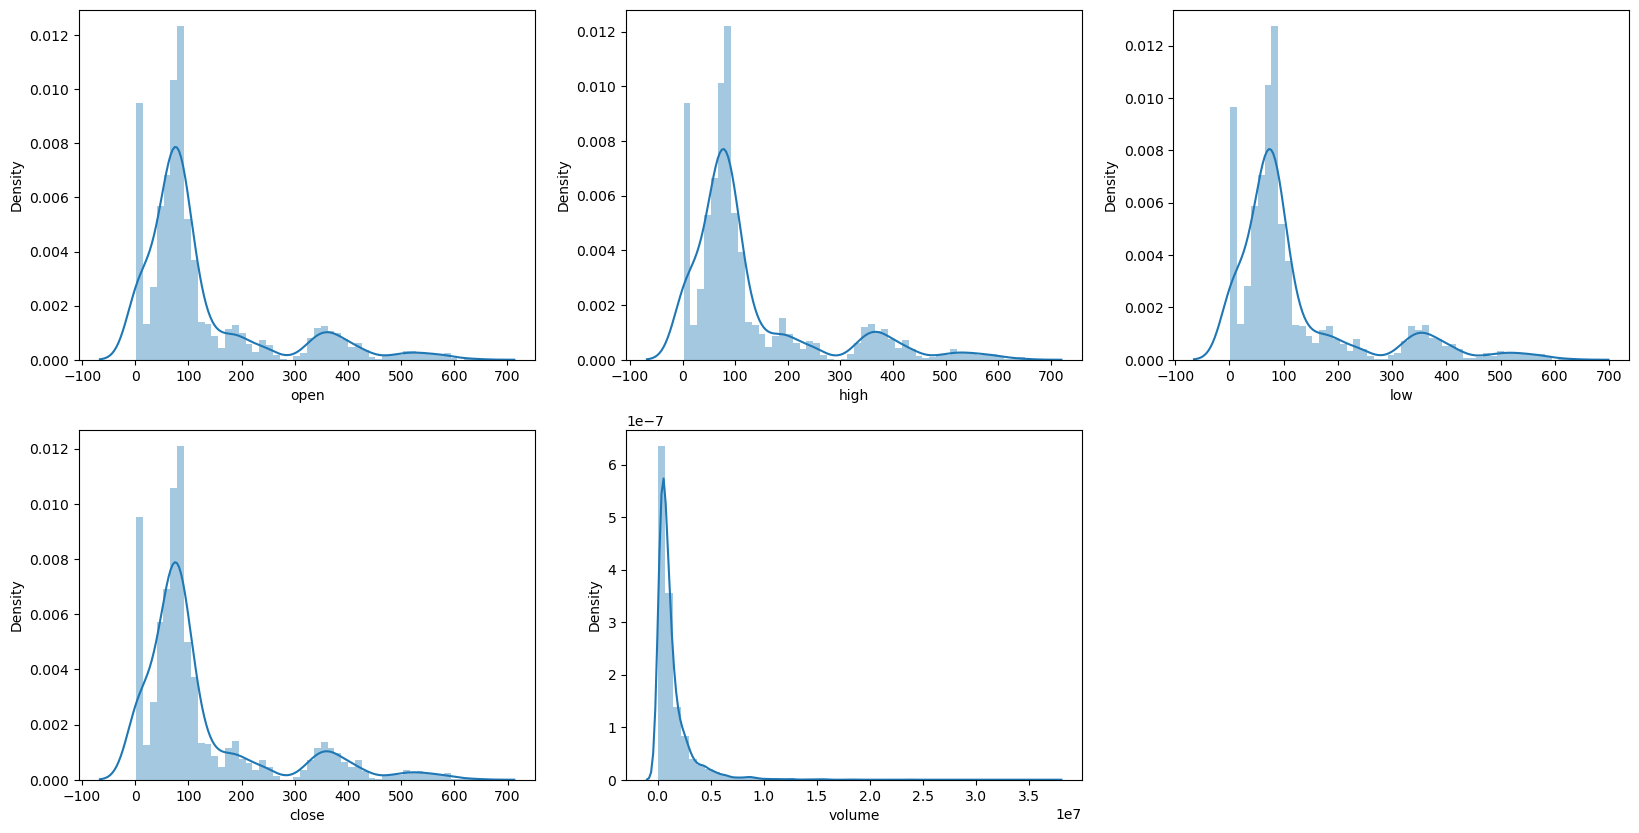

In [23]:
features = ['open', 'high', 'low', 'close', 'volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()

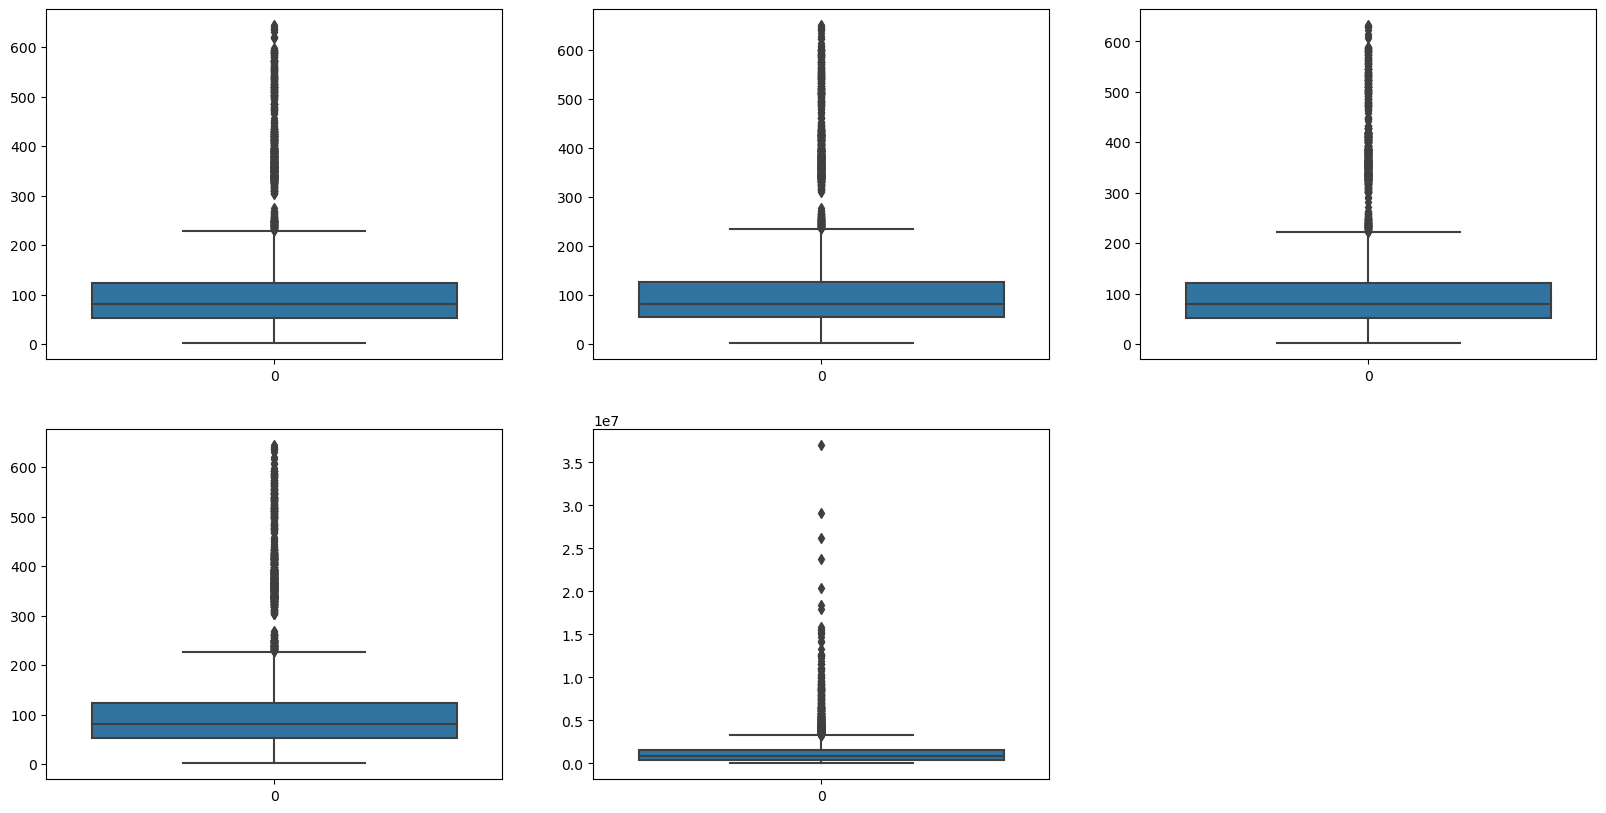

In [24]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

In [25]:
# Create a range index
index = pd.RangeIndex(0, 10)

# Try to access index 1
try:
    index.get_loc(1)
except ValueError as err:
    print(f"Error: {err}")

In [26]:
df['open-close']  = df['open'] - df['close'] 
df['low-high']  = df['low'] - df['high'] 
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

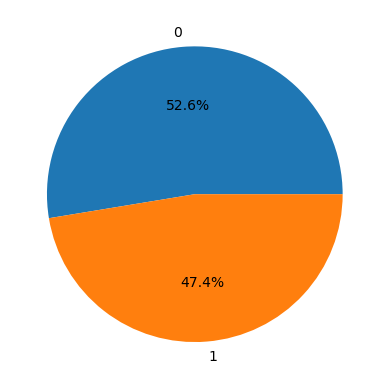

In [27]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

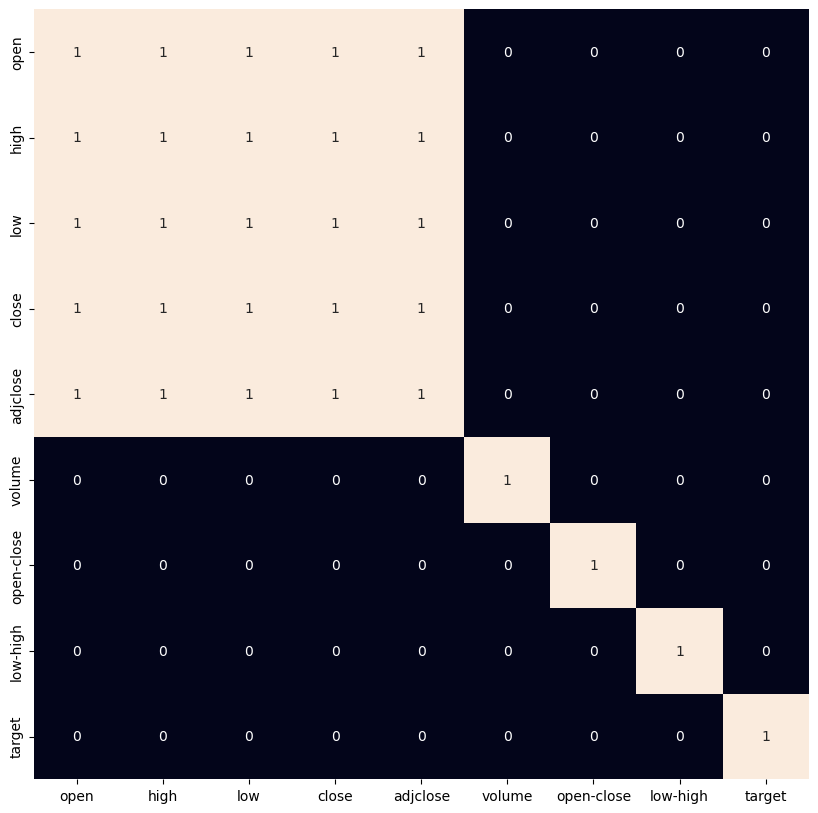

In [28]:
plt.figure(figsize=(10, 10)) 
  
# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [29]:
features = df[['open-close', 'low-high']] 
target = df['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(4887, 2) (543, 2)
